In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Excel file
excel_file = pd.ExcelFile('GCevaluation_results.xlsx')
df = excel_file.parse('GCevaluation_results')

# font
plt.rcParams["font.family"] = ["Arial", "sans-serif"]
plt.rcParams['axes.unicode_minus'] = False  

In [2]:
# Define the color mapping corresponding to each version of the model
version_color = {
    'v3': 'tab:blue',
    'v5': 'tab:green',
    'v6': 'tab:cyan',
    'v7': 'tab:purple',
    'v8': 'tab:orange',
    'v9': 'tab:red',
    'v10': 'tab:pink',
    '11': 'tab:brown',
    'v12': 'tab:gray',
    'v13': 'tab:olive'
}

# Optimize version matching logic to ensure that all models are mapped correctly
def get_version(model_name):
    for ver in ['v13', 'v12', '11', 'v10', 'v9', 'v8', 'v7', 'v6', 'v5', 'v3']:  # Match from high version to low version
        if ver in model_name:
            return ver
    return 'v3'  # default value

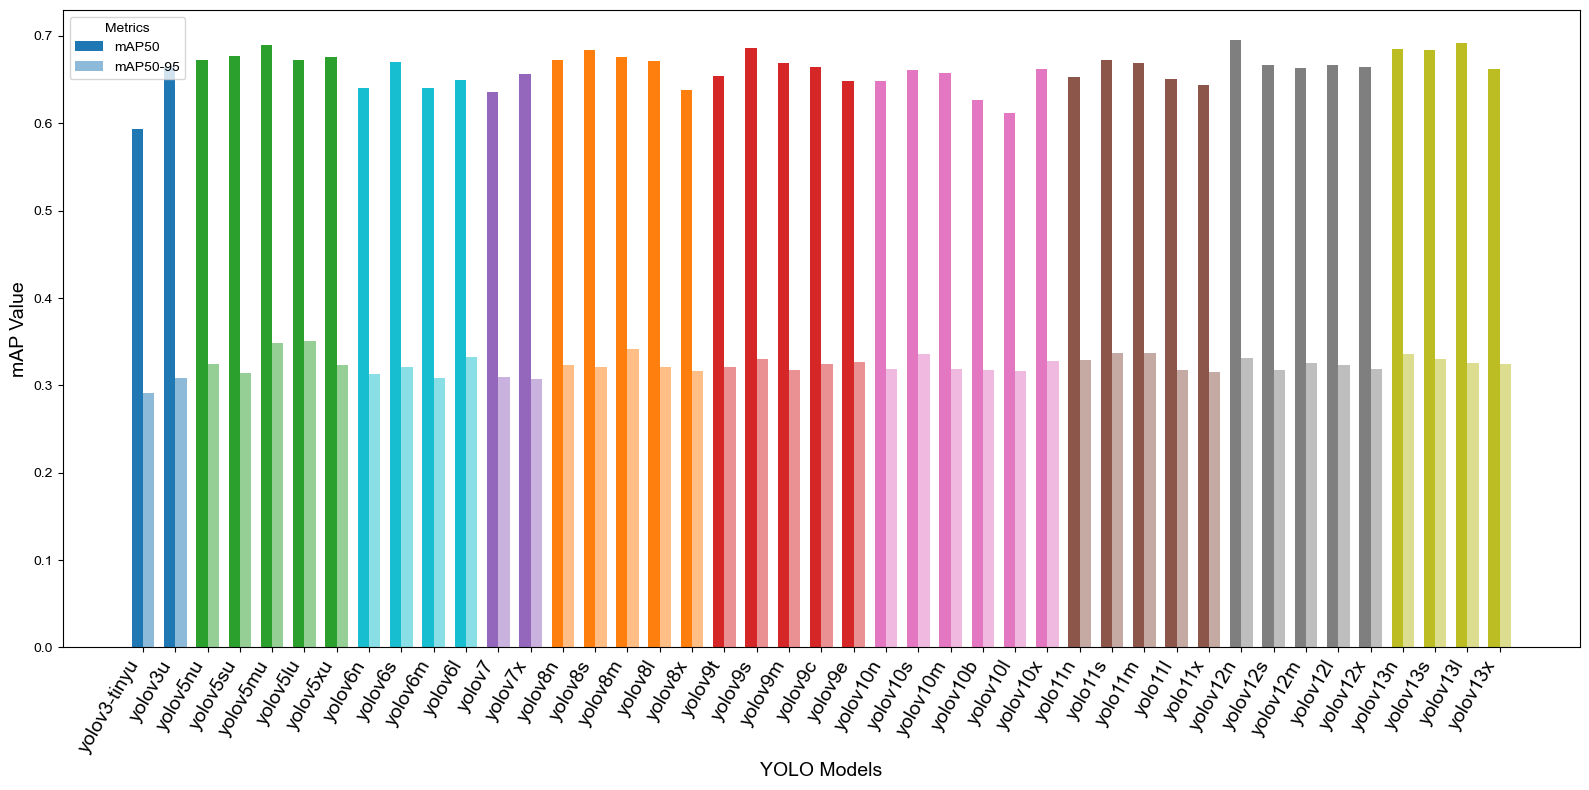

In [14]:
df['version'] = df['Model'].apply(get_version)
df['color'] = df['version'].map(version_color)

plt.figure(figsize=(16, 8))  # Resize the image to accommodate more models
n = len(df)
index = range(n)
bar_width = 0.35

for i in range(n):
    model = df.iloc[i]

    plt.bar(
        i - bar_width/2,
        model['mAP50'],
        bar_width,
        label=f'mAP50' if i == 0 else '',  # Unified legend labels to avoid duplication
        color=model['color']
    )
    # Draw mAP50_95 columns (add transparency distinction)
    plt.bar(
        i + bar_width/2,
        model['mAP50_95'],
        bar_width,
        label=f'mAP50-95' if i == 0 else '',
        color=model['color'],
        alpha=0.5  # Decrease transparency, increase discrimination
    )

# the display of coordinate axis labels
plt.xticks(index, df['Model'], rotation=60, ha='right', fontsize=14)
plt.xlabel('YOLO Models', fontsize=14)
plt.ylabel('mAP Value', fontsize=14)
# plt.title('mAP50 vs mAP50-95 Comparison by YOLO Version', fontsize=16, pad=20)

# legend layout
plt.legend(
    title='Metrics',
    bbox_to_anchor=(0, 1), 
    loc='upper left'
)

plt.tight_layout() 
plt.show()

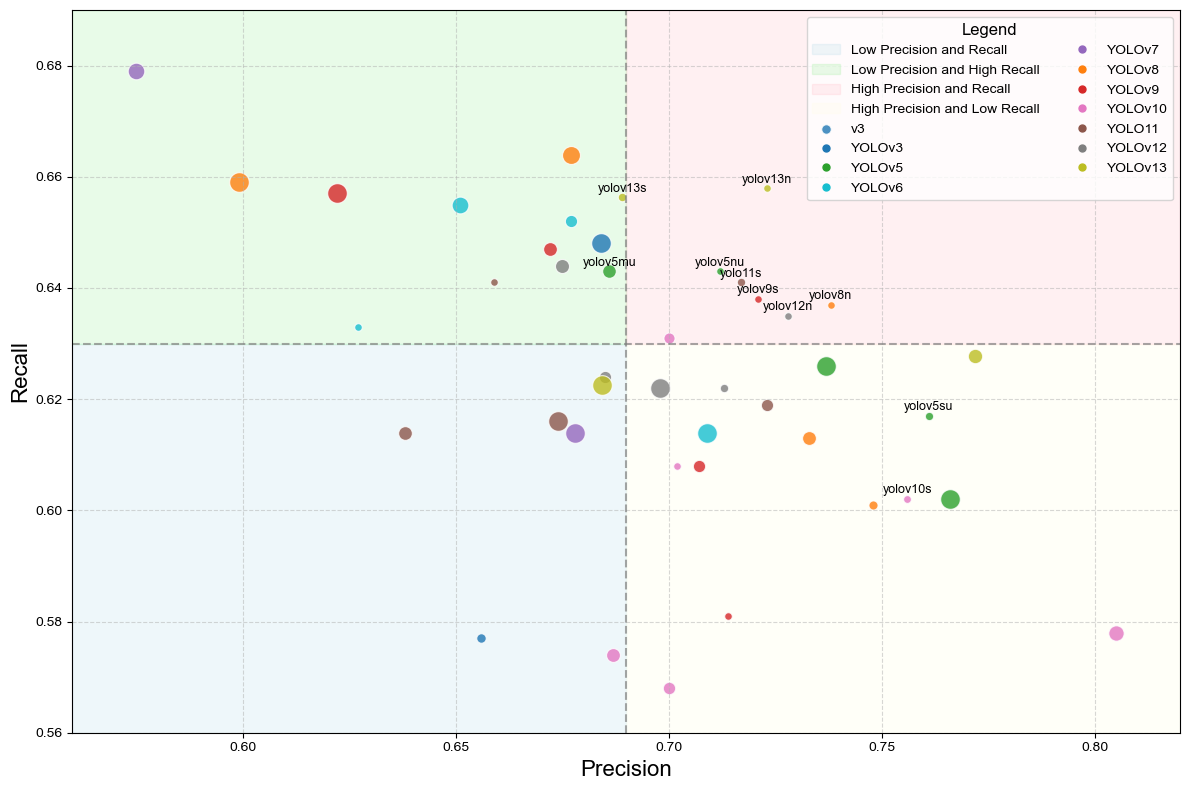

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

excel_file = pd.ExcelFile('GCevaluation_results.xlsx')
df = excel_file.parse('GCevaluation_results')

plt.rcParams["font.family"] = ["Arial", "sans-serif"]

version_color = {
    'v3': 'tab:blue',
    'v5': 'tab:green',
    'v6': 'tab:cyan',
    'v7': 'tab:purple',
    'v8': 'tab:orange',
    'v9': 'tab:red',
    'v10': 'tab:pink',
    '11': 'tab:brown',
    'v12': 'tab:gray',
    'v13': 'tab:olive'
}

def get_version(model_name):
    for ver in ['v13', 'v12', '11', 'v10', 'v9', 'v8', 'v7', 'v6', 'v5', 'v3']:
        if ver in model_name:
            return ver
    return 'v3' 
df['version'] = df['Model'].apply(get_version)

plt.figure(figsize=(12, 8))

# divide the area
plt.axvline(x=0.69, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=0.63, color='gray', linestyle='--', alpha=0.7)

plt.fill_between([0.56, 0.69], 0.56, 0.63, color='lightblue', alpha=0.2, label='Low Precision and Recall')
plt.fill_between([0.56, 0.69], 0.63, 0.69, color='lightgreen', alpha=0.2, label='Low Precision and High Recall')
plt.fill_between([0.69, 0.82], 0.63, 0.69, color='lightpink', alpha=0.2, label='High Precision and Recall')
plt.fill_between([0.69, 0.83], 0.56, 0.63, color='lightyellow', alpha=0.2, label='High Precision and Low Recall')

# List of models to be annotated(The top ten models of entropy weight)
target_models = ['yolov13n', 'yolov12n', 'yolov8n', 'yolo11s', 'yolov5nu', 
                 'yolov13s', 'yolov9s', 'yolov5mu', 'yolov10s', 'yolov5su']

for _, row in df.iterrows():
    version = row['version']
    color = version_color.get(version, 'black')
    size = np.clip(row['Model Size'] * 2, 30, 200)
    plt.scatter(
        row['Precision'], row['Recall'], 
        c=color, s=size, alpha=0.8, 
        edgecolors='white', linewidths=0.8,
        label=version if _ == 0 else ""
    )

for _, row in df.iterrows():
    if row['Model'] in target_models:
        plt.text(row['Precision'], row['Recall'] + 0.0005, row['Model'], 
                 fontsize=9, ha='center', va='bottom', bbox=None)

plt.xlim(0.56, 0.82)
plt.ylim(0.56, 0.69)

plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)


handles, labels = plt.gca().get_legend_handles_labels()

unique_labels = []
unique_handles = []
for h, l in zip(handles, labels):
    if l not in unique_labels:
        unique_labels.append(l)
        unique_handles.append(h)

version_handles = []
version_labels = []
for version, color in version_color.items():
    handle = plt.Line2D([], [], color=color, marker='o', linestyle='', markersize=5)
    version_handles.append(handle)
    version_labels.append(f'YOLO{version}')

all_handles = unique_handles + version_handles
all_labels = unique_labels + version_labels

plt.legend(
    all_handles, all_labels, 
    title='Legend', 
    loc='upper right', 
    ncol=2,
    fontsize=10,
    title_fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

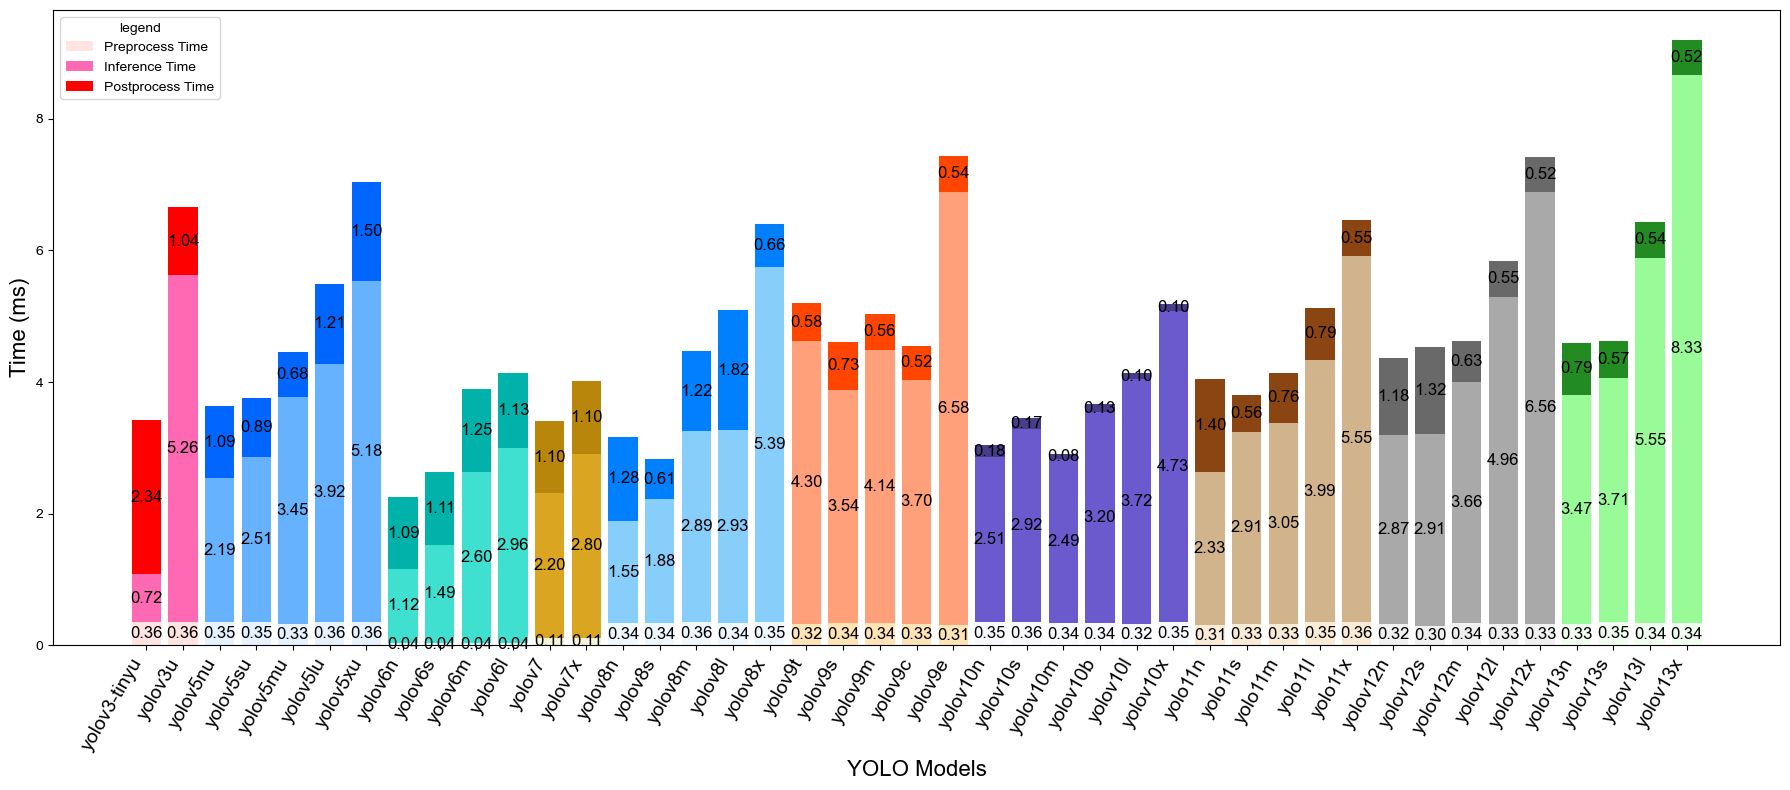

In [5]:
df['version'] = df['Model'].apply(get_version)
plt.figure(figsize=(18, 8))
version_color = {
    'v3': ['#FFE4E1', '#FF69B4', '#FF0000'], 
    'v5': ['#E6F2FF', '#66B2FF', '#0066FF'], 
    'v6': ['#E0FFFF', '#40E0D0', '#00B2AA'], 
    'v7': ['#F5F5DC', '#DAA520', '#B8860B'], 
    'v8': ['#F0F8FF', '#87CEFA', '#007FFF'], 
    'v9': ['#FFE4B5', '#FFA07A', '#FF4500'], 
    'v10': ['#F8F8FF', '#6A5ACD', '#483D8B'], 
    '11': ['#FAEBD7', '#D2B48C', '#8B4513'], 
    'v12': ['#F0F0F0', '#A9A9A9', '#696969'], 
    'v13': ['#F0FFF0', '#98FB98', '#228B22']
}


for idx, model in enumerate(df['Model']):
    ver = df.loc[idx, 'version']
    if ver not in version_color:
        continue
    pre = df.loc[idx, 'Preprocess Time']
    inf = df.loc[idx, 'Inference Time']
    post = df.loc[idx, 'Postprocess Time']
    
    bottom = 0
    for i, time_val in enumerate([pre, inf, post]):
        plt.bar(idx, time_val, bottom=bottom, color=version_color[ver][i], 
                label='Preprocess Time' if i == 0 and idx == 0 else 
                'Inference Time' if i == 1 and idx == 0 else 'Postprocess Time' if i == 2 and idx == 0 else '')

        if time_val > 0:  # Avoid labeling 0 values
            plt.text(idx, bottom + time_val / 2, f'{time_val:.2f}', ha='center', va='center', fontsize=12)
        bottom += time_val

plt.xlabel('YOLO Models', fontsize=16)
plt.ylabel('Time (ms)', fontsize=16)
#plt.title('Processing Time Comparison of YOLO Models', fontsize=12, pad=20)
plt.xticks(range(len(df)), df['Model'], rotation=60, ha='right', fontsize=14)
plt.legend(title='legend',  loc='upper left')
plt.tight_layout()
plt.show()

处理总时间与模型大小有关

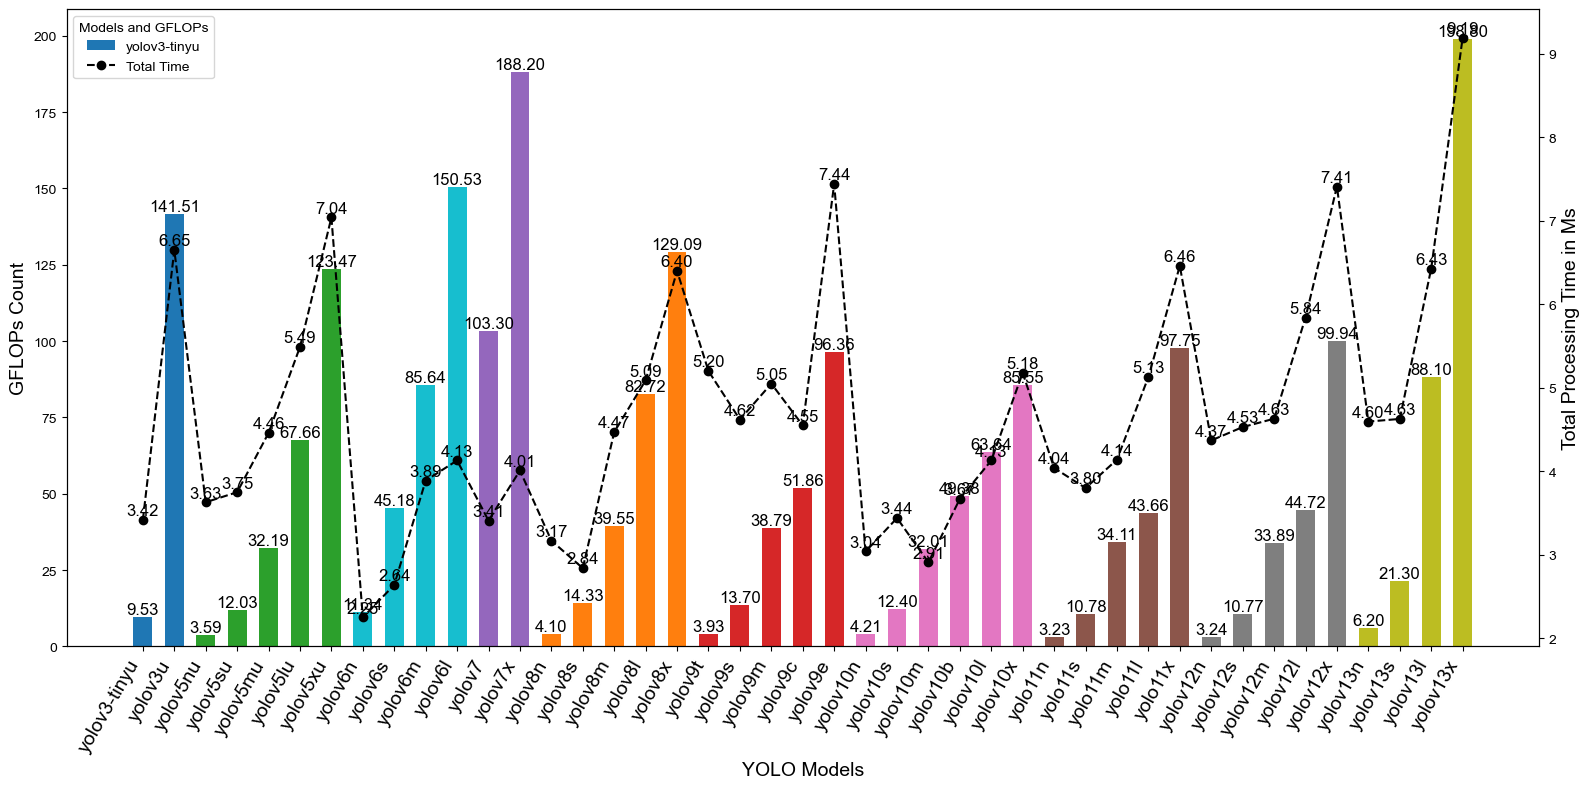

In [7]:
df['version'] = df['Model'].apply(get_version)

version_color = {
    'v3': 'tab:blue',
    'v5': 'tab:green',
    'v6': 'tab:cyan',
    'v7': 'tab:purple',
    'v8': 'tab:orange',
    'v9': 'tab:red',
    'v10': 'tab:pink',
    '11': 'tab:brown',
    'v12': 'tab:gray',
    'v13': 'tab:olive'
}

plt.figure(figsize=(16, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()

x_times = [] 
y_times = [] 

for idx, row in df.iterrows():
    model = row['Model']
    ver = row['version']
    if ver not in version_color:
        continue
    gf = row['GFLOPs']
    total_time = row['Total Time']
    color = version_color[ver]
    ax1.bar(idx, gf, width=0.6, color=color, label=f'{model}' if idx == 0 else "")
    x_times.append(idx) 
    y_times.append(total_time) 
    ax1.text(idx, gf, f'{gf:.2f}', ha='center', va='bottom', fontsize=12)

ax2.plot(x_times, y_times, marker='o', color='black', linestyle='--', label='Total Time')

for x, y in zip(x_times, y_times):
    ax2.text(x, y + 0.2, f'{y:.2f}', ha='center', va='top', fontsize=12)

ax1.set_xlabel('YOLO Models', fontsize=14)
ax1.set_ylabel('GFLOPs Count', fontsize=14, color='black')
ax2.set_ylabel('Total Processing Time in Ms', fontsize=14, color='black')
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df['Model'], rotation=60, ha='right', fontsize=14)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

unique_handles = []
unique_labels = []
for h, l in zip(handles1, labels1):
    if l not in unique_labels:
        unique_handles.append(h)
        unique_labels.append(l)

line_handle = plt.Line2D([], [], color='black', marker='o', linestyle='--', label='Total Time')
unique_handles.append(line_handle)
unique_labels.append('Total Time')

plt.legend(unique_handles, unique_labels, title='Models and GFLOPs', loc='upper left')
plt.tight_layout()
plt.show()

# Comprehensive evaluation (entropy weight)

In [9]:
# Keep only Total Time as a time metric, remove three sub-time columns
data = df.loc[:, ['mAP50', 'mAP50_95', 'Precision', 'Recall',
                   'Total Time', 'GFLOPs', 'Model Size']]

# Define positive indicators (bigger is better) and contrarian indicators (smaller is better).
positive_indices = ['mAP50', 'mAP50_95', 'Precision', 'Recall']
negative_indices = ['Total Time', 'GFLOPs', 'Model Size']

# data normalization
normalized_data = pd.DataFrame()
for col in data.columns:
    if col in positive_indices:
        # Normalization of efficiency indicators：(X - X_min)/(X_max - X_min)
        data_min = data[col].min()
        data_max = data[col].max()
        normalized_data[col] = (data[col] - data_min) / (data_max - data_min)
    else:
        # Normalization of cost metrics：(X_max - X)/(X_max - X_min)
        data_min = data[col].min()
        data_max = data[col].max()
        normalized_data[col] = (data_max - data[col]) / (data_max - data_min)

# Entropy weight calculation index weight
def entropy_weight(df):
    p = df / df.sum(axis=0)
    p = p.replace(0, 1e-8)  # Avoid log (0) errors
    e = - (p * np.log(p)).sum(axis=0) / np.log(p.shape[0])
    g = 1 - e
    return g / g.sum()

weights = entropy_weight(normalized_data)

# Calculate a composite score and sort it
scores = (normalized_data * weights).sum(axis=1)
result_df = pd.DataFrame({
    'Model': df['Model'],
    'composite score': scores
})#.sort_values('composite score', ascending=False).reset_index(drop=True)
result_df_sort = result_df.sort_values('composite score', ascending=False).reset_index(drop=True)

print("Indicator Classification：")
print("  Positive indicators (the bigger the better)）：mAP50, mAP50_95, Precision, Recall")
print("  Inverse indicator (smaller is better)：Total Time、GFLOPs、Model Size")
print("\n【Weight distribution of each indicator】")
print(weights.round(3))
print("\n【model comprehensive score】")
print(result_df_sort.round(3))

Indicator Classification：
  Positive indicators (the bigger the better)）：mAP50, mAP50_95, Precision, Recall
  Inverse indicator (smaller is better)：Total Time、GFLOPs、Model Size

【Weight distribution of each indicator】
mAP50         0.106
mAP50_95      0.120
Precision     0.147
Recall        0.219
Total Time    0.116
GFLOPs        0.152
Model Size    0.140
dtype: float64

【model comprehensive score】
           Model  composite score
0       yolov13n            0.825
1       yolov12n            0.788
2        yolov8n            0.777
3        yolo11s            0.775
4       yolov5nu            0.770
5       yolov13s            0.763
6        yolov9s            0.759
7       yolov5mu            0.751
8       yolov10s            0.716
9       yolov5su            0.715
10       yolov6s            0.715
11       yolo11n            0.713
12       yolov8s            0.707
13       yolo11m            0.694
14       yolov8m            0.688
15      yolov10m            0.682
16      yolov12s    

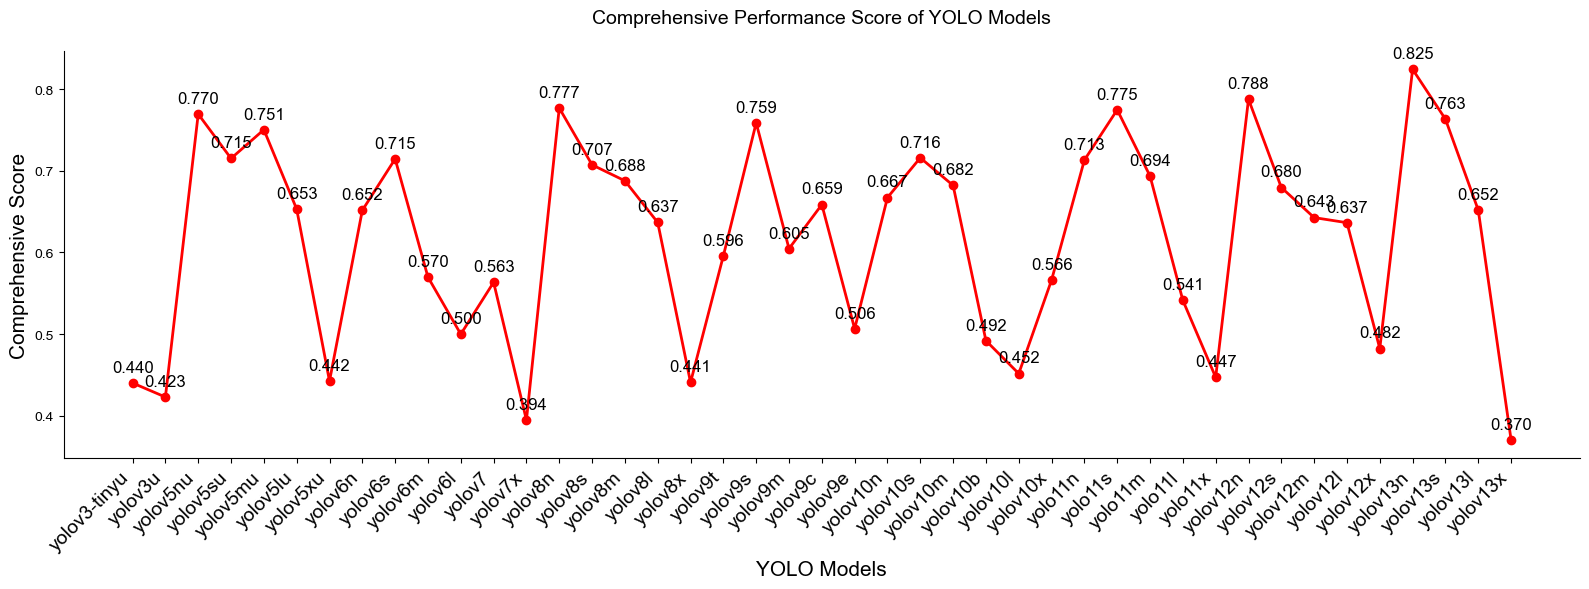

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

models = result_df['Model']
scores = result_df['composite score']

plt.figure(figsize=(16, 6))

plt.plot(models, scores, marker='o', linestyle='-', color='red', linewidth=2)

for x, y in zip(models, scores):
    plt.text(x, y+0.01, f'{y:.3f}', ha='center', va='bottom', fontsize=12)

plt.xlabel('YOLO Models', fontsize=15)
plt.ylabel('Comprehensive Score', fontsize=15)
plt.title('Comprehensive Performance Score of YOLO Models', fontsize=14, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()